In [146]:
#includes
import glob
import numpy as np
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer

In [147]:
#constants
CLIGHT = 299792458. # speed of light in [m/s]
TSUN = 4.9169e-6 # mass of sun in [s]
PC = 3.0856775807e16 # parsecs in [m]

In [148]:
#HPLib distance params (via Gaia)
dL_mid = 276 #pc
dL_sig = 1

In [149]:
#define colors
wave_colors=('#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666')
data_colors=('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00')

In [150]:
chains_04 = np.loadtxt("04yr/chains/dimension_chain.dat.1", usecols=(0,1,2,5))
chains_08 = np.loadtxt("08yr/chains/dimension_chain.dat.1", usecols=(0,1,2,5))

In [151]:
chains_04[:,0]=1000*(chains_04[:,0])
chains_04[:,1]=1e16*(chains_04[:,1])
chains_04[:,2]=np.log10(chains_04[:,2])
chains_04[:,3]=np.arccos(chains_04[:,3])*180./np.pi

chains_08[:,0]=1000*(chains_08[:,0])
chains_08[:,1]=1e16*(chains_08[:,1])
chains_08[:,2]=np.log10(chains_08[:,2])
chains_08[:,3]=np.arccos(chains_08[:,3])*180./np.pi

N = np.size(chains_04,0)

In [152]:
Mc_04 = np.empty([N])
Mc_08 = np.empty([N])

fdot_GR_04 = np.empty([N])
fdot_GR_08 = np.empty([N])

fdot_astro_04 = np.empty([N])
fdot_astro_08 = np.empty([N])

postchain_04 = np.empty([N,3])
postchain_08 = np.empty([N,3])

for n in range(0,N):
    f0 = chains_04[n,0]/1000
    dfdt = chains_04[n,1]/1e16
    A = 10**(chains_04[n,2])
    dL = np.random.normal(dL_mid,dL_sig,1)*PC/CLIGHT
    Mc_04[n] = ((dL*A/(2*(np.pi*f0)**(2./3.)))**(3./5.))/TSUN
    
    fdot_GR_04[n] = (96./5.) * ( np.pi**8. * (Mc_04[n]*TSUN)**5 * f0**11)**(1./3.)
    fdot_astro_04[n] = dfdt - fdot_GR_04[n]
    
    postchain_04[n] = [Mc_04[n], fdot_GR_04[n], fdot_astro_04[n]]

    f0 = chains_08[n,0]/1000
    dfdt = chains_08[n,1]/1e16
    A = 10**(chains_08[n,2])
    dL = np.random.normal(dL_mid,dL_sig,1)*PC/CLIGHT
    Mc_08[n] = ((dL*A/(2*(np.pi*f0)**(2./3.)))**(3./5.))/TSUN
    
    fdot_GR_08[n] = (96./5.) * ( np.pi**8. * (Mc_08[n]*TSUN)**5 * f0**11)**(1./3.)
    fdot_astro_08[n] = dfdt - fdot_GR_08[n]

    postchain_08[n] = [Mc_08[n], fdot_GR_08[n], fdot_astro_08[n]]


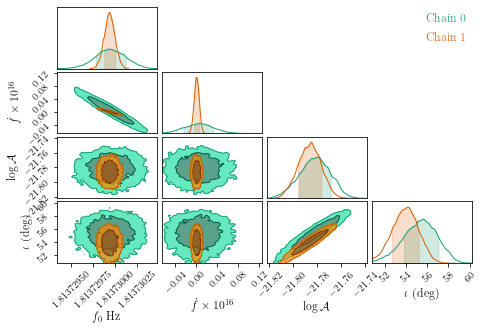

In [153]:
c = ChainConsumer()
c.add_chain(chains_04, parameters=[r'$f_0\ \rm{Hz}$', r'$\dot{f}\times10^{16}$', '$\log\mathcal{A}$', r'$\iota$ (deg)'], color=wave_colors[0])
c.add_chain(chains_08, parameters=[r'$f_0\ \rm{Hz}$', r'$\dot{f}\times10^{16}$', '$\log\mathcal{A}$', r'$\iota$ (deg)'], color=wave_colors[1])
fig = c.plotter.plot(filename="gbmcmc_chain.pdf", figsize=[2*3.39,2*3.39*(np.sqrt(5)-1.0)/2.0])


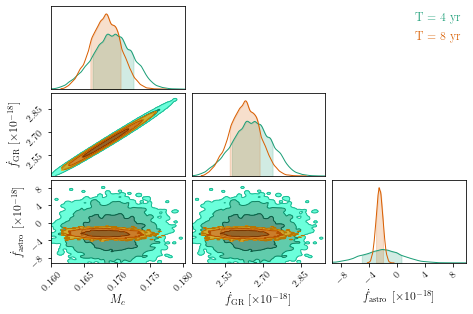

In [156]:
c = ChainConsumer()
c.add_chain(postchain_04, parameters=[r'$M_c$', r'$\dot{f}_{\rm GR}$', r'$\dot{f}_{\rm astro}$'], color=wave_colors[0], name='T = 4 yr')
c.add_chain(postchain_08, parameters=[r'$M_c$', r'$\dot{f}_{\rm GR}$', r'$\dot{f}_{\rm astro}$'], color=wave_colors[1], name='T = 8 yr')
c.configure(summary=True,plot_hists=True, sigmas=[0,1,2,3])
fig = c.plotter.plot(filename="gbmcmc_postchain.pdf", figsize=[2*3.39,2*3.39*(np.sqrt(5)-1.0)/2.0])
